In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
df = pd.read_csv('C:/Users/vivek/desktop/emotion_analysis/face_data.csv')
print(df.head())
print(df.info())



   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
 Usage     35887 non-null object
 pixels    35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


In [4]:
x = df.iloc[4,2]

In [5]:
x = np.array(x.split(' '), dtype='float32')

In [6]:
x = x.reshape(48,48)

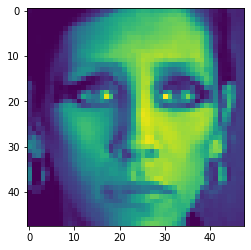

In [7]:
plt.imshow(x)

In [8]:
X_train, Y_train, X_test, Y_test = [],[],[],[]

for index, row in df.iterrows():
    val = row[2].split(' ')
    try:
        if 'Training' in row[1]:
            X_train.append(np.array(val, dtype='float32'))
            Y_train.append(row[0])
        elif 'PublicTest' in row[1]:
            X_test.append(np.array(val, dtype='float32'))
            Y_test.append(row[0])
    except:
        print(f"error occured at index: {index} and row: {row}")

print(f'X_train sample data: {X_train[0:2]}')
print(f'Y_train sample data: {Y_train[0:2]}')
print(f'X_test sample data: {X_test[0:2]}')
print(f'Y_test sample data: {Y_test[0:2]}')

X_train sample data: [array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32), array([151., 150., 147., ..., 193., 183., 184.], dtype=float32)]
Y_train sample data: [0, 0]
X_test sample data: [array([254., 254., 254., ...,  42., 129., 180.], dtype=float32), array([156., 184., 198., ..., 172., 167., 161.], dtype=float32)]
Y_test sample data: [0, 1]


In [9]:
X_train = np.array(X_train, 'float32')
Y_train = np.array(Y_train, 'float32')
X_test = np.array(X_test, 'float32')
Y_test = np.array(Y_test, 'float32')

In [10]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

(48, 48)


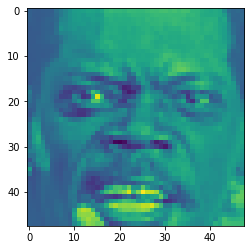

In [11]:
X_Train = X_train.reshape(X_train.shape[0], 48,48)
print(X_Train[0].shape)
plt.imshow(X_Train[10])

In [12]:
batch_size = 64
epochs = 50
num_labels = 7
width, height = 48,48

In [13]:
X_train = X_train.reshape(X_train.shape[0], height, width, 1)
X_test = X_test.reshape(X_test.shape[0], height, width, 1)


In [14]:
Y_train = np_utils.to_categorical(Y_train, num_classes=num_labels)
Y_test = np_utils.to_categorical(Y_test, num_classes=num_labels)

In [15]:
Y_train[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
X_train.shape[1:]

(48, 48, 1)

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape=[48,48,1]))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3),  activation = 'relu'))
model.add(Conv2D(128, (3,3),  activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(512, (3,3),  activation = 'relu'))
model.add(Conv2D(512, (3,3),  activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

# model.add(Conv2D(128, (3,3),  activation = 'relu'))
# model.add(Conv2D(512, (3,3),  activation = 'relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'] )
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 18, 18, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 9, 9, 128)        

In [27]:
model.fit(X_train, Y_train,
         batch_size=batch_size,
         epochs=epochs,
          validation_data = (X_test, Y_test),
            )

Train on 28709 samples, validate on 3589 samples
Epoch 1/50
28709/28709 [==============================] - 32s 1ms/step - loss: 1.8006 - accuracy: 0.2536 - val_loss: 1.7276 - val_accuracy: 0.2867
Epoch 2/50
28709/28709 [==============================] - 29s 1ms/step - loss: 1.6587 - accuracy: 0.3347 - val_loss: 1.5165 - val_accuracy: 0.4035
Epoch 3/50
28709/28709 [==============================] - 29s 1ms/step - loss: 1.5297 - accuracy: 0.3944 - val_loss: 1.4097 - val_accuracy: 0.4536
Epoch 4/50
28709/28709 [==============================] - 29s 1ms/step - loss: 1.4579 - accuracy: 0.4313 - val_loss: 1.3625 - val_accuracy: 0.4787
Epoch 5/50
28709/28709 [==============================] - 29s 1ms/step - loss: 1.4160 - accuracy: 0.4505 - val_loss: 1.3148 - val_accuracy: 0.4887
Epoch 6/50
28709/28709 [==============================] - 29s 1ms/step - loss: 1.3776 - accuracy: 0.4696 - val_loss: 1.2724 - val_accuracy: 0.5113
Epoch 7/50
28709/28709 [==============================] - 29s 1ms/ste

In [30]:
fer_json = model.to_json()
with open('fer.json', 'w') as json_file:
    json_file.write(fer_json)
model.save_weights('fer.h5')